In [1]:
from pathlib import Path
from src.dataloaders.brats import BRATS
from src.utils import get_device, IoU, IoU2
import torch
import numpy as np
import matplotlib.pyplot as plt


def custom_sort_key(filename):
    filename_str = str(filename)
    num_e = int(filename_str.split("_e")[1].split("_b")[0])
    num_b = int(filename_str.split("_b")[1].split(".")[0])
    return num_e, num_b

def is_binary_image(image_array):
    unique_values = np.unique(image_array)
    if len(unique_values) <= 2:
        return 'Binary'
    else:
        return 'Not Binary'

path = Path("../../../results/res-dulcet-plasma-25") # baseline

img = sorted(list(path.glob("img" + "/*")), key=custom_sort_key)
target = sorted(list(path.glob("target" + "/*")), key=custom_sort_key)
pred = sorted(list(path.glob("pred" + "/*")), key=custom_sort_key)
loaded_model = path.glob("/.pth")

print(len(img), len(target), len(pred), type(loaded_model))

634 0 1600 <class 'generator'>


Using mps
----- 3 cur_iou1 3.08641975299116e-11 train_iou1 3.08641975299116e-11 cur_iou2 0.0 train_iou2 0.0
tar sum 324.0 Binary min 0.0 max 1.0
pred1 sum -3740314.8 Not Binary min -132.00174 max -1.7101533
pred2 sum 3.7732203 Not Binary min 0.0 max 0.15314382
pred3 sum 0 Binary min False max False
match sum 0 Binary min 0 max 0


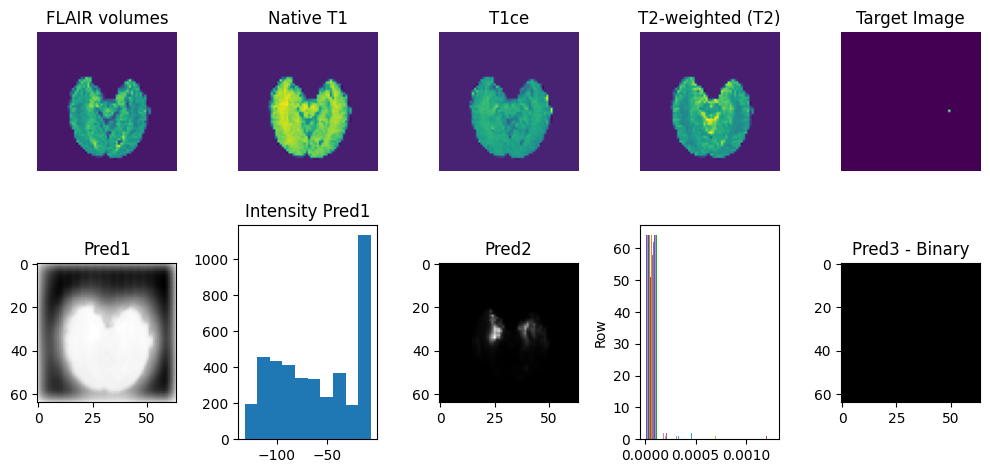

----- 4 cur_iou1 1.536098310268263e-11 train_iou1 4.622518063259423e-11 cur_iou2 0.0 train_iou2 0.0
tar sum 651.0 Binary min 0.0 max 1.0
pred1 sum -3444978.2 Not Binary min -130.70857 max -0.6530857
pred2 sum 13.287542 Not Binary min 0.0 max 0.34229454
pred3 sum 0 Binary min False max False
match sum 0 Binary min 0 max 0
----- 5 cur_iou1 0.003870967748362123 train_iou1 0.003870967794587304 cur_iou2 0.0038709677419105104 train_iou2 0.0038709677419105104
tar sum 1550.0 Binary min 0.0 max 1.0
pred1 sum -3612990.5 Not Binary min -131.87224 max 0.039373398
pred2 sum 126.44539 Not Binary min 0.0 max 0.5098421
pred3 sum 6 Binary min False max True
match sum 0 Binary min 0 max 0
----- 6 cur_iou1 7.220216606446064e-12 train_iou1 0.0038709678018075204 cur_iou2 0.0 train_iou2 0.0038709677419105104
tar sum 1385.0 Binary min 0.0 max 1.0
pred1 sum -4224333.0 Not Binary min -138.43994 max -0.17920208
pred2 sum 43.632607 Not Binary min 0.0 max 0.45531902
pred3 sum 0 Binary min False max False
match su

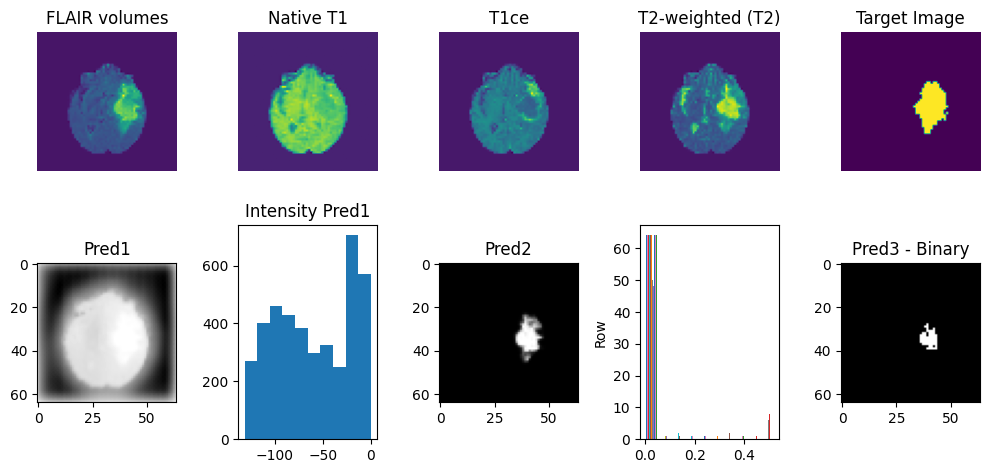

----- 131 cur_iou1 0.07675722294490403 train_iou1 3.2851628208787376 cur_iou2 0.07675722294059183 train_iou2 3.2851628152515744
tar sum 2319.0 Binary min 0.0 max 1.0
pred1 sum -3892272.0 Not Binary min -133.86505 max 0.24266768
pred2 sum 479.59308 Not Binary min 0.0 max 0.5603709
pred3 sum 178 Binary min False max True
match sum 0 Binary min 0 max 0
----- 132 cur_iou1 0.007751938061414577 train_iou1 3.292914758940152 cur_iou2 0.007751937983895198 train_iou2 3.2929147532354697
tar sum 129.0 Binary min 0.0 max 1.0
pred1 sum -4317562.0 Not Binary min -135.78635 max 0.020356238
pred2 sum 16.977993 Not Binary min 0.0 max 0.50508887
pred3 sum 1 Binary min False max True
match sum 0 Binary min 0 max 0
----- 140 cur_iou1 3.906249999847412e-11 train_iou1 3.2929147589792147 cur_iou2 0.0 train_iou2 3.2929147532354697
tar sum 256.0 Binary min 0.0 max 1.0
pred1 sum -3899920.0 Not Binary min -138.09283 max -1.6710691
pred2 sum 9.143658 Not Binary min 0.0 max 0.15828168
pred3 sum 0 Binary min False m

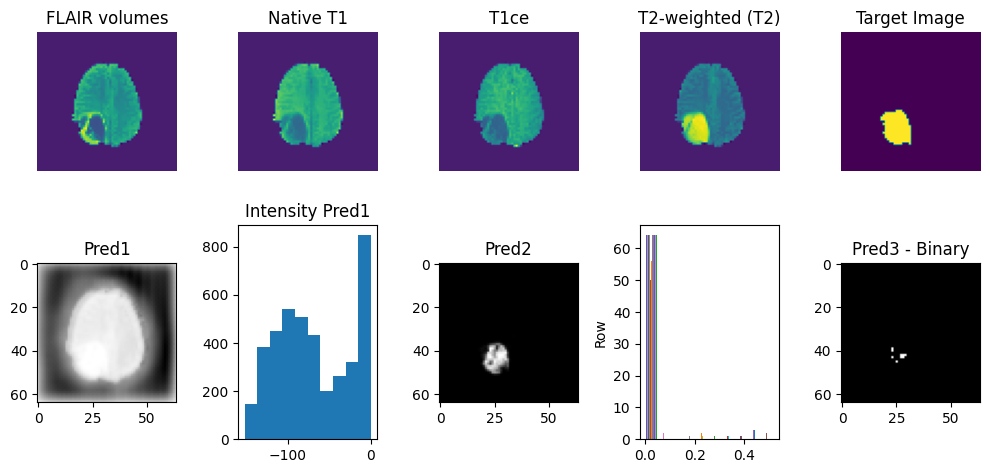

----- 221 cur_iou1 8.196721310803548e-11 train_iou1 5.508356877260845 cur_iou2 0.0 train_iou2 5.508356861696794
tar sum 122.0 Binary min 0.0 max 1.0
pred1 sum -6001424.5 Not Binary min -158.6066 max -5.560848
pred2 sum 0.10350334 Not Binary min 0.0 max 0.0038307817
pred3 sum 0 Binary min False max False
match sum 0 Binary min 0 max 0
----- 226 cur_iou1 1.1111111098765432e-09 train_iou1 5.5083568783719565 cur_iou2 0.0 train_iou2 5.508356861696794
----- 227 cur_iou1 1.5174506828297808e-11 train_iou1 5.508356878387131 cur_iou2 0.0 train_iou2 5.508356861696794
tar sum 659.0 Binary min 0.0 max 1.0
pred1 sum -4213155.0 Not Binary min -162.37437 max -0.7953694
pred2 sum 7.8136377 Not Binary min 0.0 max 0.31101692
pred3 sum 0 Binary min False max False
match sum 0 Binary min 0 max 0
----- 228 cur_iou1 0.03433658330210116 train_iou1 5.5426934616892325 cur_iou2 0.03433658329786208 train_iou2 5.542693444994656
tar sum 2359.0 Binary min 0.0 max 1.0
pred1 sum -4414643.0 Not Binary min -180.55273 ma

In [23]:
from src.models.unet import UNet
from src.models.unet_dropout import UNet as UNetDropout
from src.models.ensemble import UNet as Ensemble

valid_set = BRATS('../../../../special-course/data/MICCAI_BraTS_2018_Data_Training', mode='val', subset=0.6, size=[64, 64, 155])
valid_dataloader = torch.utils.data.DataLoader(valid_set, batch_size=16, shuffle=False, drop_last=False)
device = get_device()
# model = UNet('test-iou')
model = UNetDropout()

# model.load_state_dict(torch.load('../../../results/res-star-force-42/trained_model.pth')) # baseline +
# model.load_state_dict(torch.load('../../../results/res-galactic-wookie-41/trained_model.pth')) # dropout +
# model.load_state_dict(torch.load('../../../results/res-elegant-tie-fighter-44/models/model_55.pth')) # affine +
# model.load_state_dict(torch.load('../../../results/res-jedi-destroyer-45/models/model_63.pth')) # elastic +
# model.load_state_dict(torch.load('../../../results/res-light-bothan-43/trained_model.pth')) # dropout + affine +
model.load_state_dict(torch.load('../../../results/res-solar-dust-36/model_ep50.pth')) # dropout + elastic
# model.load_state_dict(torch.load('../../../results/res-noble-shape-49/trained_model.pth')) # early drop baseline
# model.load_state_dict(torch.load('../../../results/res-logical-dream-100/trained_model.pth')) # early drop dropout
# model.load_state_dict(torch.load('../../../results/res-wandering-haze-92/trained_model.pth')) # early drop elastic
# model.load_state_dict(torch.load('../../../results/res-zesty-glade-90/trained_model.pth')) # early drop elastic+dropout
# print(type(model))
train_loss = 0.0
train_iou1 = 0.0
train_iou2 = 0.0
iou_arr = []

for index, (inputs, targets, _) in enumerate(valid_dataloader):
        # inputs, targets = inputs.to(device), targets.to(device)
        np_tar = targets.detach().numpy()
        if np_tar.sum() == 0.0:
            iou_arr.append(np.NAN)
            continue
        logits = model(inputs)
        criterion = torch.nn.BCEWithLogitsLoss(pos_weight=torch.tensor(0.0093))
        loss = criterion(logits, targets)
        train_loss += float(loss)
        cur_iou1 = float(IoU(targets.detach(), torch.sigmoid(logits.detach()).ge(0.5)))
        cur_iou2 = float(IoU2(targets.detach(), torch.sigmoid(logits.detach()).ge(0.5)))
        train_iou1 += cur_iou1
        train_iou2 += cur_iou2
        iou_arr.append(train_iou1)
        np_img = inputs.detach().numpy()

        np_pred1 = logits.detach().numpy()
        np_pred2 = torch.sigmoid(logits.detach()).cpu().numpy()
        np_pred3 = torch.sigmoid(logits.detach()).ge(0.5).cpu().detach().numpy()

        matched_pixels = np.where((np_tar > 0) & (np_pred1 > 0.5), 1, 0)

        print('-----', index, 'cur_iou1', cur_iou1, 'train_iou1', train_iou1,
                              'cur_iou2', cur_iou2, 'train_iou2', train_iou2)
        if np_tar.sum() < 10.0:
            continue

        print('tar', 'sum', np_tar.sum(), is_binary_image(np_tar), 'min', np_tar.min(), 'max', np_tar.max())
        print('pred1', 'sum', np_pred1.sum(), is_binary_image(np_pred1), 'min', np_pred1.min(), 'max', np_pred1.max())
        print('pred2', 'sum', np_pred2.sum(), is_binary_image(np_pred2), 'min', np_pred2.min(), 'max', np_pred2.max())
        print('pred3', 'sum', np_pred3.sum(), is_binary_image(np_pred3), 'min', np_pred3.min(), 'max', np_pred3.max())
        print('match', 'sum', matched_pixels.sum(), is_binary_image(matched_pixels), 'min', matched_pixels.min(), 'max', matched_pixels.max())

        if index == 3 or index == 130 or index == 220:
            fig, axes = plt.subplots(2, 5, figsize=(10, 5))

            axes[0][0].imshow(np_img[0, 0, :, :])
            axes[0][0].set_title('FLAIR volumes')
            axes[0][0].axis('off')

            axes[0][1].imshow(np_img[0, 1, :, :])
            axes[0][1].set_title('Native T1')
            axes[0][1].axis('off')

            axes[0][2].imshow(np_img[0, 2, :, :])
            axes[0][2].set_title('T1ce')
            axes[0][2].axis('off')

            axes[0][3].imshow(np_img[0, 3, :, :])
            axes[0][3].set_title('T2-weighted (T2)')
            axes[0][3].axis('off')

            axes[0][4].imshow(np_tar[0, 0, :, :])#, cmap='binary')
            axes[0][4].set_title('Target Image')
            axes[0][4].axis('off')

            axes[1][0].imshow(np_pred1[0, 0, :, :], cmap='gray')
            axes[1][0].set_title('Pred1')

            axes[1][1].hist(np_pred1[0, 0, :, :].flatten())
            axes[1][1].set_title('Intensity Pred1')

            axes[1][2].imshow(np_pred2[0, 0, :, :], cmap='gray')
            axes[1][2].set_title('Pred2')

            axes[1][3].hist(np_pred2[0, 0, :, :])
            axes[1][3].set_ylabel('Row')

            axes[1][4].imshow(np_pred3[0, 0, :, :], cmap='gray')
            axes[1][4].set_title('Pred3 - Binary')

            plt.tight_layout()
            plt.show()


print('IOU array before', len(iou_arr))
iou_arr = [val for val in iou_arr if not np.isnan(val)]
print('IOU array after', len(iou_arr))
print('Final IOU1', train_iou1, train_iou1/len(iou_arr))
print('Final IOU2', train_iou2, train_iou2/len(iou_arr))


In [8]:
type(iou_arr[0])
print(iou_arr[0])
print(np.isnan(iou_arr[0]) )

nan
True
